In [ ]:
pip install nltk spacy indic-nlp-library matplotlib

In [ ]:
!python -m spacy download de_core_news_sm


!python -m spacy download fr_core_news_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.6/14.6 MB 17.0 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('de_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.3/16.3 MB 30.0 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('fr_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


This study project is called Multilingual Spam Detection, which aims to close  gap by creating an advanced machine-learning model that uses a thorough understanding of linguistic nuances and cultural settings across multiple languages to effectively identify and filter spam. Leveraging a vast and varied dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
import re
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.tokenize import word_tokenize
import nltk
from indicnlp.tokenize import indic_tokenize

In [ ]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
df = pd.read_csv('/content/data-en-hi-de-fr.csv')

In [ ]:
df.head()

,labels,text,text_hi,text_de,text_fr
0,ham,"Go until jurong point, crazy.. Available only ...","Dakag बिंदु तक जाओ, पागल. केवल Bag Non महान वि...","Gehen Sie bis jurong Punkt, verrückt.. Verfügb...","Allez jusqu'à Jurong point, fou.. Disponible s..."
1,ham,Ok lar... Joking wif u oni...,ओके लामर.... if if uue पर.,Ok Lar... joking wif u oni...,J'ai fait une blague sur le wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Fktatatat 21 मई को प्राप्त करने के लिए मुफ्त प...,Freier Eintritt in 2 a wkly comp zum Gewinn FA...,Entrée libre dans 2 a wkly comp pour gagner FA...
3,ham,U dun say so early hor... U c already then say...,Uden इतना जल्दी कहते हैं... तो पहले से ही यूसी...,U dun sagen so früh... U c schon dann sagen...,U dun dit si tôt hor... U c déjà dire alors...
4,ham,"Nah I don't think he goes to usf, he lives aro...","नहीं, मुझे नहीं लगता कि वह हमारे लिए चला जाता ...","Nein, ich glaube nicht, dass er zu unsf geht, ...","Non, je ne pense pas qu'il va à usf, il vit da..."


In [ ]:
df.shape

(5572, 5)

In [ ]:
df.isna().sum()

labels     0
text       0
text_hi    0
text_de    0
text_fr    0
dtype: int64

In [ ]:
df.duplicated().sum()

415

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   labels   5572 non-null   object
 1   text     5572 non-null   object
 2   text_hi  5572 non-null   object
 3   text_de  5572 non-null   object
 4   text_fr  5572 non-null   object
dtypes: object(5)
memory usage: 217.8+ KB


In [ ]:
df = df.drop_duplicates(keep = 'first')
df.duplicated().sum()

0

In [ ]:
df['labels'].value_counts()

ham     4516
spam     641
Name: labels, dtype: int64

In [ ]:
import plotly.express as px

# Calculate the distribution of labels
label_distribution = df['labels'].value_counts().reset_index()
label_distribution.columns = ['Label', 'Count']

fig = px.bar(label_distribution, x='Label', y='Count', title='Distribution of Spam vs. Non-Spam Messages', text='Count')
fig.update_traces(texttemplate='%{text}', textposition='outside')
fig.show()


In [ ]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go


In [ ]:
df['text_word_count'] = df['text'].apply(lambda x: len(word_tokenize(x)) if pd.notnull(x) else 0)
df['text_hi_word_count'] = df['text_hi'].apply(lambda x: len(word_tokenize(x)) if pd.notnull(x) else 0)
df['text_de_word_count'] = df['text_de'].apply(lambda x: len(word_tokenize(x)) if pd.notnull(x) else 0)
df['text_fr_word_count'] = df['text_fr'].apply(lambda x: len(word_tokenize(x)) if pd.notnull(x) else 0)

In [ ]:
from nltk.tokenize import sent_tokenize

df['text_sentence_count'] = df['text'].apply(lambda x: len(sent_tokenize(x)) if pd.notnull(x) else 0)
df['text_hi_sentence_count'] = df['text_hi'].apply(lambda x: len(sent_tokenize(x)) if pd.notnull(x) else 0)
df['text_de_sentence_count'] = df['text_de'].apply(lambda x: len(sent_tokenize(x)) if pd.notnull(x) else 0)
df['text_fr_sentence_count'] = df['text_fr'].apply(lambda x: len(sent_tokenize(x)) if pd.notnull(x) else 0)

In [ ]:
df['text_character_count'] = df['text'].apply(lambda x: len(x.replace(" ", "")) if pd.notnull(x) else 0)
df['text_hi_character_count'] = df['text_hi'].apply(lambda x: len(x.replace(" ", "")) if pd.notnull(x) else 0)
df['text_de_character_count'] = df['text_de'].apply(lambda x: len(x.replace(" ", "")) if pd.notnull(x) else 0)
df['text_fr_character_count'] = df['text_fr'].apply(lambda x: len(x.replace(" ", "")) if pd.notnull(x) else 0)

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Visualization for Character Count across the four text columns
fig = make_subplots(rows=2, cols=2, subplot_titles=("English Text Character Count", "Hindi Text Character Count",
                                                    "German Text Character Count", "French Text Character Count"))

# English Text Character Count
fig.add_trace(go.Histogram(x=df['text_character_count'], name='English Text', nbinsx=40), row=1, col=1)

# Hindi Text Character Count
fig.add_trace(go.Histogram(x=df['text_hi_character_count'], name='Hindi Text', nbinsx=40), row=1, col=2)

# German Text Character Count
fig.add_trace(go.Histogram(x=df['text_de_character_count'], name='German Text', nbinsx=40), row=2, col=1)

# French Text Character Count
fig.add_trace(go.Histogram(x=df['text_fr_character_count'], name='French Text', nbinsx=40), row=2, col=2)

fig.update_layout(height=800, width=1000, title_text="Character Count Distribution by Language")
fig.show()


In [ ]:
# Visualization for Sentence Count across the four text columns
fig = make_subplots(rows=2, cols=2, subplot_titles=("English Text Sentence Count", "Hindi Text Sentence Count",
                                                    "German Text Sentence Count", "French Text Sentence Count"))

# English Text Sentence Count
fig.add_trace(go.Histogram(x=df['text_sentence_count'], name='English Text', nbinsx=40), row=1, col=1)

# Hindi Text Sentence Count
fig.add_trace(go.Histogram(x=df['text_hi_sentence_count'], name='Hindi Text', nbinsx=40), row=1, col=2)

# German Text Sentence Count
fig.add_trace(go.Histogram(x=df['text_de_sentence_count'], name='German Text', nbinsx=40), row=2, col=1)

# French Text Sentence Count
fig.add_trace(go.Histogram(x=df['text_fr_sentence_count'], name='French Text', nbinsx=40), row=2, col=2)

fig.update_layout(height=800, width=1000, title_text="Sentence Count Distribution by Language")
fig.show()


word cloud for the English text column

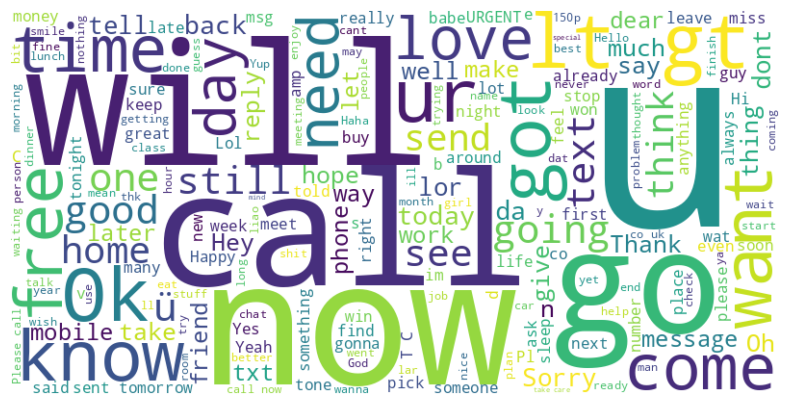

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt


text = ' '.join(df['text'])  # Combine all text into a single string
wordcloud = WordCloud(width=800, height=400, background_color ='white').generate(text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


word cloud for the Hindi text column

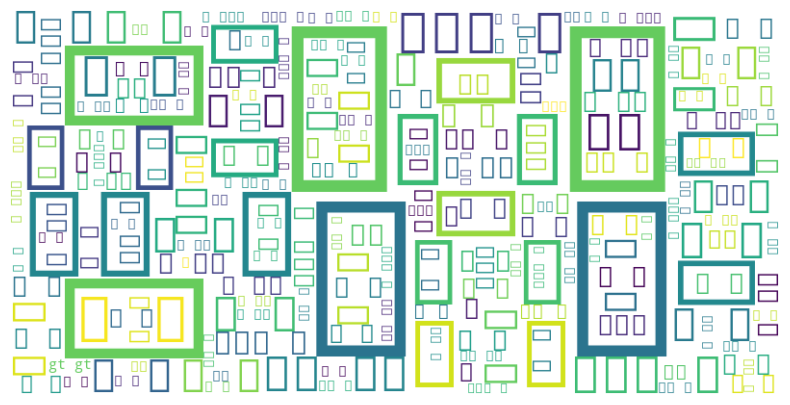

In [ ]:

text1 = ' '.join(df['text_hi'])  # Combine all text into a single string
wordcloud = WordCloud(width=800, height=400, background_color ='white').generate(text1)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()



word cloud for the German text column



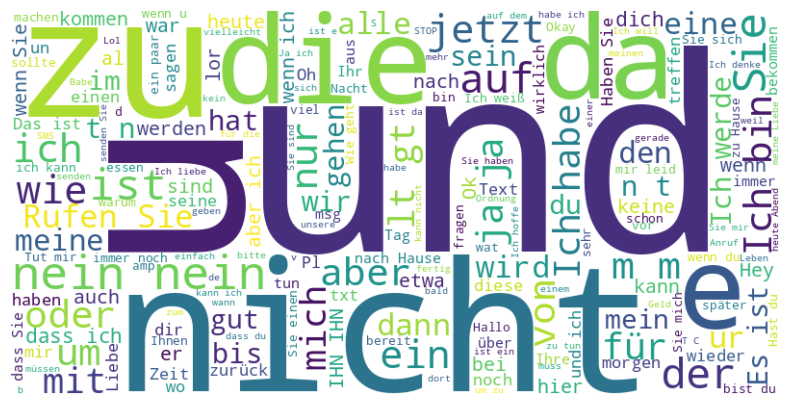

In [ ]:

text2 = ' '.join(df['text_de'])  # Combine all text into a single string
wordcloud = WordCloud(width=800, height=400, background_color ='white').generate(text2)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

word cloud for the French text column

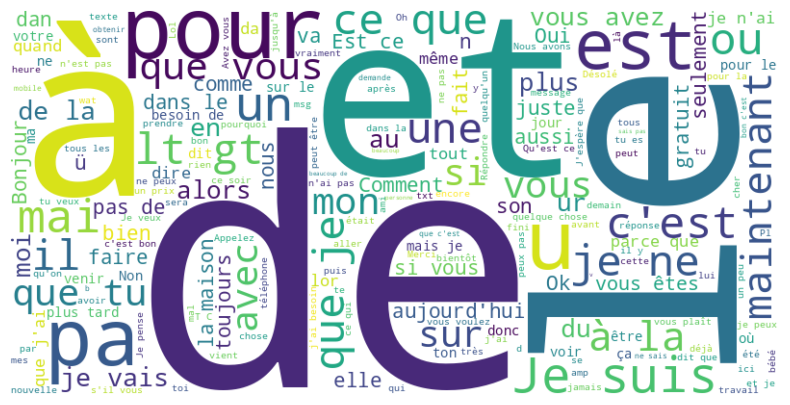

In [ ]:

text3 = ' '.join(df['text_fr'])  # Combine all text into a single string
wordcloud = WordCloud(width=800, height=400, background_color ='white').generate(text3)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


This scatter plot shows a positive linear relationship between word count and sentence count in French text; as the number of words increases, the number of sentences tends to increase as well. The trendline suggests this general pattern, although there's some variability in sentence length across different texts.

In [ ]:
fig = px.scatter(df, x='text_fr_word_count', y='text_sentence_count',
                 title='French Text Word Count vs Sentence Count',
                 labels={'text_fr_word_count': 'French word count', 'text_sentence_count': 'Sentence Count'},
                 trendline='ols')  # Optional: Add a trendline

fig.show()


In [ ]:
fig = px.scatter(df, x='text_de_word_count', y='text_fr_word_count',
                 title='German Text Word Count vs  French Text Word Count',
                 labels={'text_de_word_count': ' G_word count', 'text_fr_word_count': 'F_word_Count'},
                 trendline='ols')  # Optional: Add a trendline

fig.show()

This scatter plot compares the word counts of German and French texts, showing a positive correlation where texts with more words in German also tend to have more words in French. The trendline suggests a consistent relationship across the dataset.

The plot has a trendline, which is likely calculated using ordinary least squares (OLS) regression to show the average trend in the data. The trendline indicates that there is a positive linear relationship between the number of words and the number of sentences. This suggests that, generally, as the number of words in the French text increases, the number of sentences also increases, which is an expected correlation in textual data

In [ ]:
fig = px.scatter(df, x='text_hi_word_count', y='text_de_word_count',
                 title='Hindi Text Word Count vs German Text Word Count',
                 labels={'text_hi_word_count': 'Hindi word count', 'text_de_word_count': 'German word Count'},
                 trendline='ols')  # Optional: Add a trendline

fig.show()

In [ ]:
fig = px.scatter(df, x='text_word_count', y='text_hi_word_count',
                 title='English Text Word Count vs Hindi Word Count',
                 labels={'text_word_count': ' English word count', 'text_hi_word_count': 'Hindi word Count'},
                 trendline='ols')  # Optional: Add a trendline

fig.show()

In [ ]:
# Function to clean and preprocess text for all languages
def clean_and_tokenize(text, language='english'):
    if pd.isnull(text):
        return ''

    # Convert text to lowercase
    text = text.lower()
    # Remove special characters
    text = re.sub(r'[^\w\s]', '', text)
    # Tokenize
    tokens = word_tokenize(text, language=language if language in ['english', 'german', 'french'] else 'english')
    # Remove stop words
    if language == 'hindi':
        # Load Hindi stop words
        try:
            with open("/content/stopwords-hi.txt", "r", encoding="utf-8") as file:
                hindi_stopwords = file.read().splitlines()
        except FileNotFoundError:
            hindi_stopwords = []
        filtered_tokens = [token for token in tokens if token not in hindi_stopwords]
    else:
        filtered_tokens = [token for token in tokens if token not in stopwords.words(language)]

    # Join tokens back to string
    return ' '.join(filtered_tokens)

In [ ]:
# Clean and preprocess text for each language
for lang, lang_code in [('text', 'english'), ('text_hi', 'hindi'), ('text_de', 'german'), ('text_fr', 'french')]:
    df[lang] = df[lang].apply(lambda x: clean_and_tokenize(x, language=lang_code))

df.head()

,labels,text,text_hi,text_de,text_fr,text_word_count,text_hi_word_count,text_de_word_count,text_fr_word_count,text_sentence_count,text_hi_sentence_count,text_de_sentence_count,text_fr_sentence_count,text_character_count,text_hi_character_count,text_de_character_count,text_fr_character_count
0,ham,go jurong point crazy available bugis n great ...,dakag बद जओ पगल कवल bag non महन वशव cag म उपलब...,gehen jurong punkt verrückt verfügbar buggis n...,allez jusquà jurong point fou disponible seule...,24,23,25,27,2,2,1,1,92,78,99,97
1,ham,ok lar joking wif u oni,ओक लमर if if uue,ok lar joking wif u oni,jai fait blague wif u oni,8,8,8,10,2,1,1,1,24,21,24,32
2,spam,free entry 2 wkly comp win fa cup final tkts 2...,fktatatat 21 मई क परपत करन क लए मफत परवषट म पठ...,freier eintritt 2 a wkly comp gewinn fa cup fi...,entrée libre 2 a wkly comp gagner fa cup final...,37,36,39,38,2,3,3,2,128,140,142,147
3,ham,u dun say early hor u c already say,uden इतन जलद कहत ह त पहल स ह यस कहत ह,u dun sagen früh u c schon sagen,u dun dit si tôt hor u déjà dire alors,13,14,12,13,1,1,1,1,39,47,37,36
4,ham,nah dont think goes usf lives around though,नह मझ नह लगत क हमर लए चल जत ह क आसपस रहत ह हलक,nein glaube unsf geht lebt nähe,non pense quil va usf vit coin,15,20,19,17,1,1,1,1,49,65,57,44


 Word cloud of spam messages it shows the important words in English

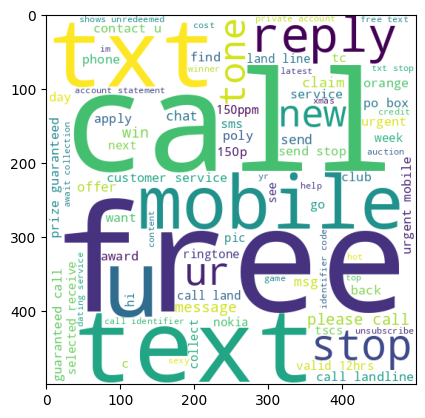

In [ ]:
# Word cloud of spam messages it shows the important words in text
wc = WordCloud(width = 500, height=500, min_font_size=10, background_color = 'white')
spam_wordcloud = wc.generate(df[df['labels'] =='spam']['text'].str.cat(sep=" "))
plt.imshow(spam_wordcloud)

Word cloud of spam messages it shows the important words in Hindi

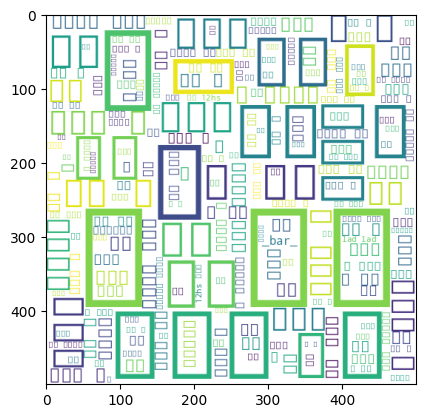

In [ ]:
# Word cloud of spam messages it shows the important words in text
wc1 = WordCloud(width = 500, height=500, min_font_size=10, background_color = 'white')
spam_wordcloud1 = wc.generate(df[df['labels'] =='spam']['text_hi'].str.cat(sep=" "))
plt.imshow(spam_wordcloud1)

Word cloud of spam messages it shows the important words in German

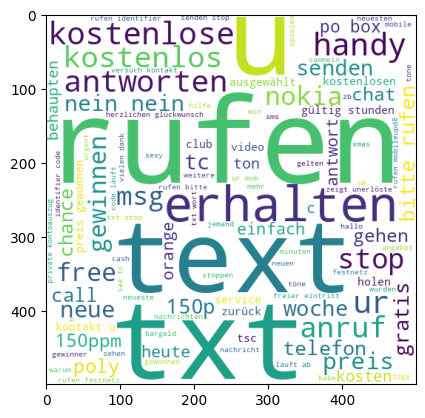

In [ ]:
# Word cloud of spam messages it shows the important words in text
wc2 = WordCloud(width = 500, height=500, min_font_size=10, background_color = 'white')
spam_wordcloud2 = wc.generate(df[df['labels'] =='spam']['text_de'].str.cat(sep=" "))
plt.imshow(spam_wordcloud2)

Word cloud of spam messages it shows the important words in French

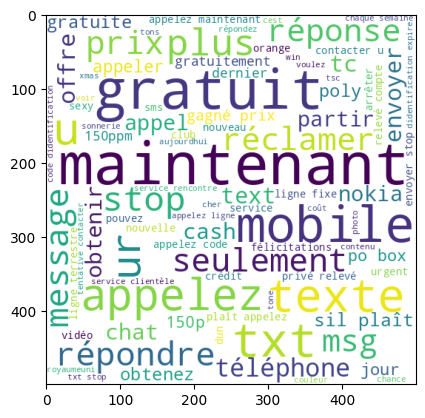

In [ ]:
# Word cloud of spam messages it shows the important words in text
wc3 = WordCloud(width = 500, height=500, min_font_size=10, background_color = 'white')
spam_wordcloud3 = wc.generate(df[df['labels'] =='spam']['text_fr'].str.cat(sep=" "))
plt.imshow(spam_wordcloud3)

Word cloud of ham messages it shows the important words in English

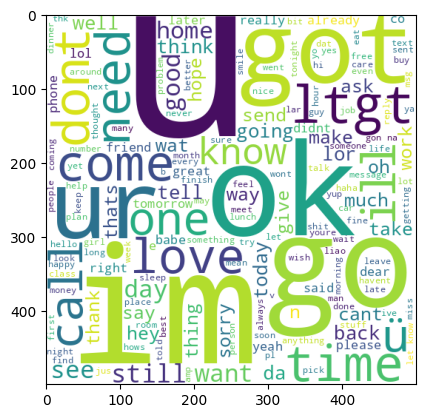

In [ ]:
# Word cloud of ham messages it shows the important words in text
wc4 = WordCloud(width = 500, height=500, min_font_size=10, background_color = 'white')
spam_wordcloud4 = wc.generate(df[df['labels'] =='ham']['text'].str.cat(sep=" "))
plt.imshow(spam_wordcloud4)

Word cloud of ham messages it shows the important words in Hindi

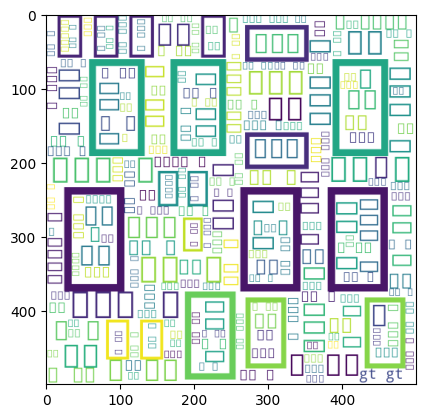

In [ ]:
# Word cloud of ham messages it shows the important words in text
wc5 = WordCloud(width = 500, height=500, min_font_size=10, background_color = 'white')
spam_wordcloud5 = wc.generate(df[df['labels'] =='ham']['text_hi'].str.cat(sep=" "))
plt.imshow(spam_wordcloud5)

Word cloud of ham messages it shows the important words in French

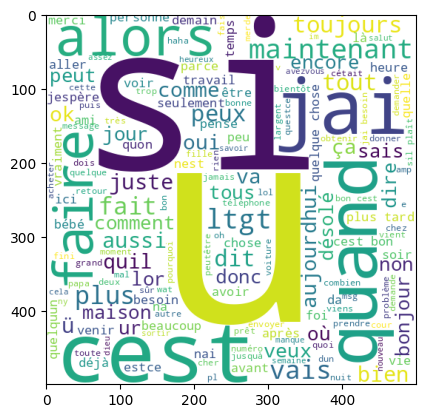

In [ ]:
# Word cloud of ham messages it shows the important words in text
wc6 = WordCloud(width = 500, height=500, min_font_size=10, background_color = 'white')
spam_wordcloud6 = wc.generate(df[df['labels'] =='ham']['text_fr'].str.cat(sep=" "))
plt.imshow(spam_wordcloud6)

Word cloud of ham messages it shows the important words in german

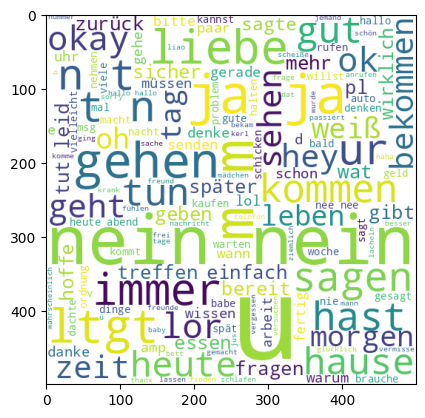

In [ ]:
# Word cloud of ham messages it shows the important words in text
wc7 = WordCloud(width = 500, height=500, min_font_size=10, background_color = 'white')
spam_wordcloud7 = wc.generate(df[df['labels'] =='ham']['text_de'].str.cat(sep=" "))
plt.imshow(spam_wordcloud7)

In [ ]:
#lets get top 30 words in sapm messages
spam_corpus = []
for msg in df[df['labels'] =='spam']['text_de'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
len(spam_corpus)

10401

In [ ]:
#this are top 30 words in spam
from collections import Counter
df_spam = pd.DataFrame(Counter(spam_corpus).most_common(30), columns=['Word', 'Frequency'])
df_spam

,Word,Frequency
0,rufen,223
1,2,168
2,txt,121
3,u,118
4,ur,111
5,4,94
6,text,80
7,stop,77
8,preis,63
9,erhalten,58


In [ ]:
#lets get top 30 words in sapm messages
spam_corpus1 = []
for msg in df[df['labels'] =='spam']['text'].tolist():
    for word in msg.split():
        spam_corpus1.append(word)
len(spam_corpus1)

10614

In [ ]:
#this are top 30 words in spam
df_spam1 = pd.DataFrame(Counter(spam_corpus1).most_common(30), columns=['Word', 'Frequency'])
df_spam1

,Word,Frequency
0,call,294
1,free,183
2,2,154
3,txt,124
4,u,121
5,ur,119
6,stop,105
7,text,103
8,mobile,101
9,4,95


In [ ]:
#lets get top 30 words in sapm messages
spam_corpus2 = []
for msg in df[df['labels'] =='spam']['text_hi'].tolist():
    for word in msg.split():
        spam_corpus2.append(word)
len(spam_corpus2)


#this are top 30 words in spam
df_spam1 = pd.DataFrame(Counter(spam_corpus2).most_common(30), columns=['Word', 'Frequency'])
df_spam1






,Word,Frequency
0,क,1377
1,ह,794
2,लए,509
3,स,262
4,करन,236
5,म,233
6,य,229
7,आपक,171
8,रह,143
9,कल,126


In [ ]:
#lets get top 30 words in sapm messages
spam_corpus3 = []
for msg in df[df['labels'] =='spam']['text_fr'].tolist():
    for word in msg.split():
        spam_corpus3.append(word)
len(spam_corpus3)


#this are top 30 words in spam
df_spam1 = pd.DataFrame(Counter(spam_corpus3).most_common(30), columns=['Word', 'Frequency'])
df_spam1


,Word,Frequency
0,appelez,171
1,2,153
2,maintenant,139
3,txt,123
4,u,111
5,prix,100
6,gratuit,98
7,4,94
8,mobile,93
9,a,83
